# NOAA API Use Case 

The following use case will detail data from the NOAA Co-OPS Data Retrieval API. You can learn more information here :https://api.tidesandcurrents.noaa.gov/api/prod/. Data regarding tidal/water levels, wind data, temperature data, air temperature/pressure, conductivity, visibility, humidity, and salinity are available. The locations where data is availble is based on buoy and instrumentation location. Predictions as well as reviewed NOAA data is available to users. 

## Requirements
folium  
matplotlib
requests  
json  
numpy  


## Install packages

We will pip install MatplotLib, a Python package that will allow us to plot the data. 

In [1]:
!pip install -q matplotlib

## Import packages

Next to set-up the use case we will call various packages and modules using the " import function". This will allow us to more seamlessly use the packages as needed throughout the notebook. Packages inclue NumPy(https://numpy.org/) and Pandas (https://pandas.pydata.org/).

In [2]:
import requests 
import numpy as np
import pandas as pd
import folium
import json
import matplotlib.pyplot as plt
from pandas import json_normalize

## Gathering data from API Call 

The following example will be plotting Wind Data (Hourly) in Key West, FL during July 2021. The url should include information as a start and end date, the product, units, station number, and what format you would like the data. More information for how to build the API again can be found 
https://api.tidesandcurrents.noaa.gov/api/prod/. Here we are using Python Requests, retrieving the data, and converting it into a Pandas Dataframe. 

In [3]:

url = ("https://api.tidesandcurrents.noaa.gov/api/prod/datagetter?begin_date=20210701&end_date=20210731&station=8724580&product=wind&time_zone=lst_ldt&interval=h&units=english&application=DataAPI_Sample&format=json")

r = requests.get(url)
json_data= r.json()
data = json_data['data']
df = json_normalize(data)
df["s"] = pd.to_numeric(df["s"], downcast="float")
print(df)

                    t      s       d   dr      g    f
0    2021-07-01 00:00   4.86  103.00  ESE   8.36  0,0
1    2021-07-01 01:00  12.44  164.00  SSE  20.02  0,0
2    2021-07-01 02:00   6.80  178.00    S  10.30  0,0
3    2021-07-01 03:00   4.67  195.00  SSW   8.75  0,0
4    2021-07-01 04:00   3.69  219.00   SW   4.86  0,0
..                ...    ...     ...  ...    ...  ...
739  2021-07-31 19:00   5.64  122.00  ESE   7.19  0,0
740  2021-07-31 20:00   3.50  117.00  ESE   6.22  0,0
741  2021-07-31 21:00    NaN                      1,1
742  2021-07-31 22:00   7.00  132.00   SE   8.75  0,0
743  2021-07-31 23:00   5.44  123.00  ESE   8.16  0,0

[744 rows x 6 columns]


## Plotting data using Matplotlib 
The hourly wind data is plotted with data and times on the x axis and the Wind Speed in Knots on the y axis. The date/time data is shown only at certain intervals to prevent overcrowding of the axis and is then rotated for ease of reading. 

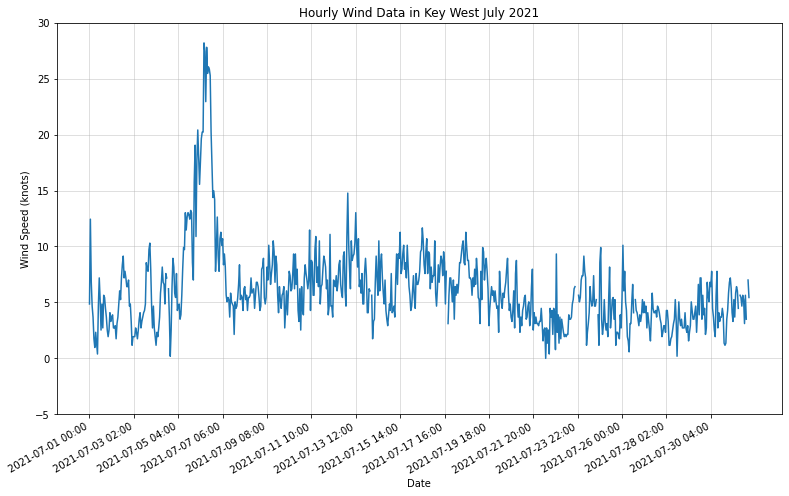

In [9]:
fig, ax = plt.subplots()
FL =ax.plot(df["t"], df["s"], label= 'Windspeed (knots)')
ax.set_xticks(ax.get_xticks()[::50])
ax.set_yticks(ax.get_yticks()[::])
fig.autofmt_xdate()
fig.set_size_inches(13, 8)
ax.set_title("Hourly Wind Data in Key West July 2021")
ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed (knots)")
ax.grid(True,alpha=0.5)